In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("C:\python\data.csv",encoding='latin1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


checking the total rows and columns

In [5]:
df.shape

(541909, 8)

In [6]:
print('The dataset has ',df.shape[0],'rows and ',df.shape[1],'columns')

The dataset has  541909 rows and  8 columns


# Datatypes and information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# we found that there is some missing values and datatypes were wrong

In [10]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [11]:
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [12]:
df['StockCode']=df['StockCode'].str.replace(r'\D+','',regex=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# checking missing values and treatment

In [15]:
df.isna().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [16]:
df['Description'].mode().values[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [17]:
df['Description']=df['Description'].fillna(df['Description'].mode().values[0])

In [18]:
df=df.dropna(subset=['CustomerID'])

In [19]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
df.shape

(406829, 8)

# checking duplicates and dropping duplicates

In [22]:
df.duplicated().sum()

5260

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(401569, 8)

# Dataset Description

In [26]:
df.describe(include=['number'])

,Quantity,UnitPrice,CustomerID
count,401569.000000,401569.000000,401569.000000
mean,12.183722,3.474276,15281.145375
std,250.293917,69.767071,1714.002897
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16782.000000
max,80995.000000,38970.000000,18287.000000


# checking for outliers

In [28]:
num_df=df.select_dtypes(include=['number'])

num_df

In [30]:
num_df

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


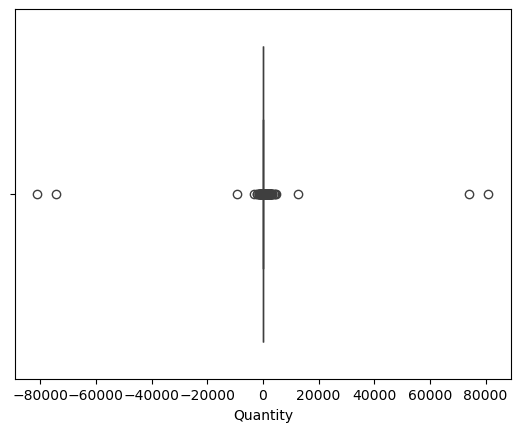

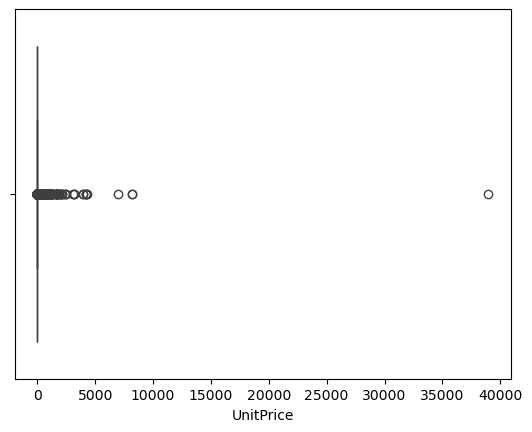

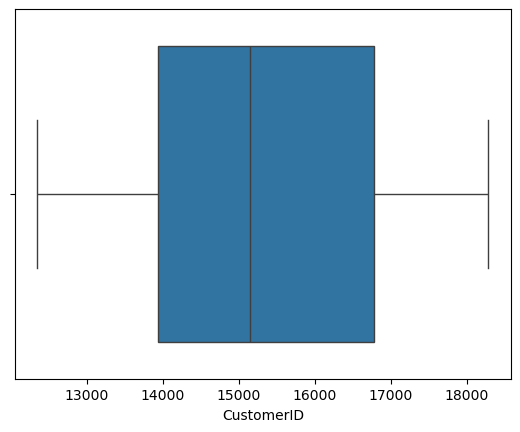

In [31]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# outlier treatment

In [33]:
for i in num_df:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5 *iqr
    df[i]=df[i].clip(lower=lc,upper=uc)

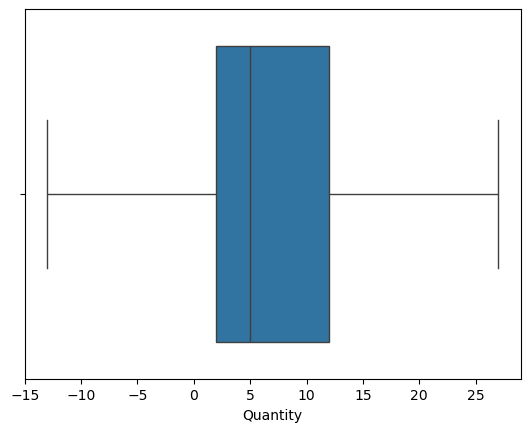

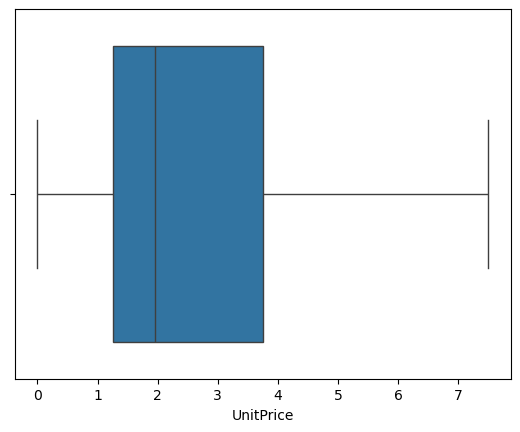

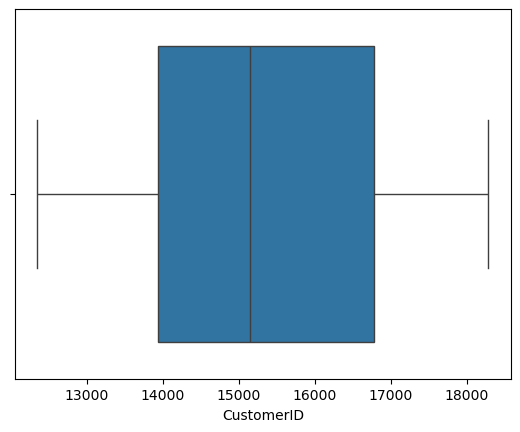

In [34]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

To make better insights we can extract the month,year from the invoice date column

In [36]:
df['Year']=df['InvoiceDate'].dt.year
df['Months']=df['InvoiceDate'].dt.month_name()
df['weekday']=df['InvoiceDate'].dt.isocalendar().week

# visulaizations

In [38]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Months', 'weekday'],
      dtype='object')

In [39]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_base', '_compat', '_core', '_docstrings', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_palette', 'pairplot', 

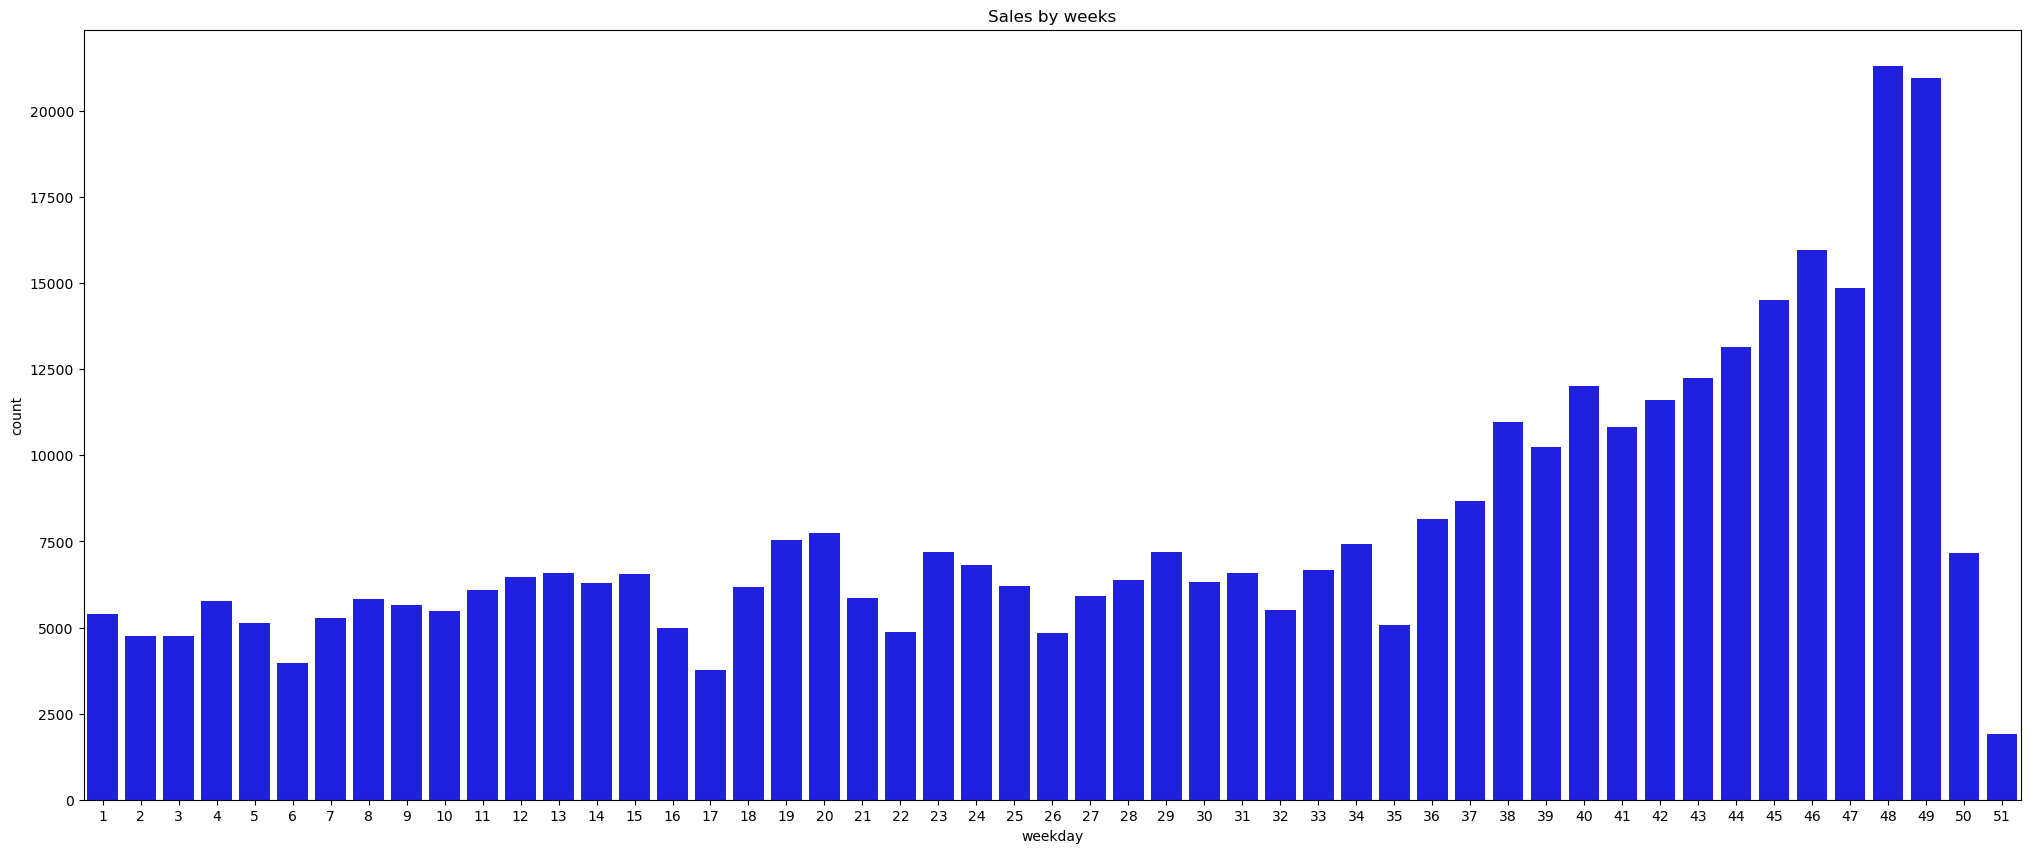

In [40]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x='weekday',color='Blue')
plt.title("Sales by weeks")
plt.savefig("weeks wis sales.png")
plt.show()


In [41]:
d2=df[df['Quantity'] > 0]
d2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Months,weekday
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48


In [42]:
d3=d2.groupby(by=['Year','Country'])[['Quantity']].mean()

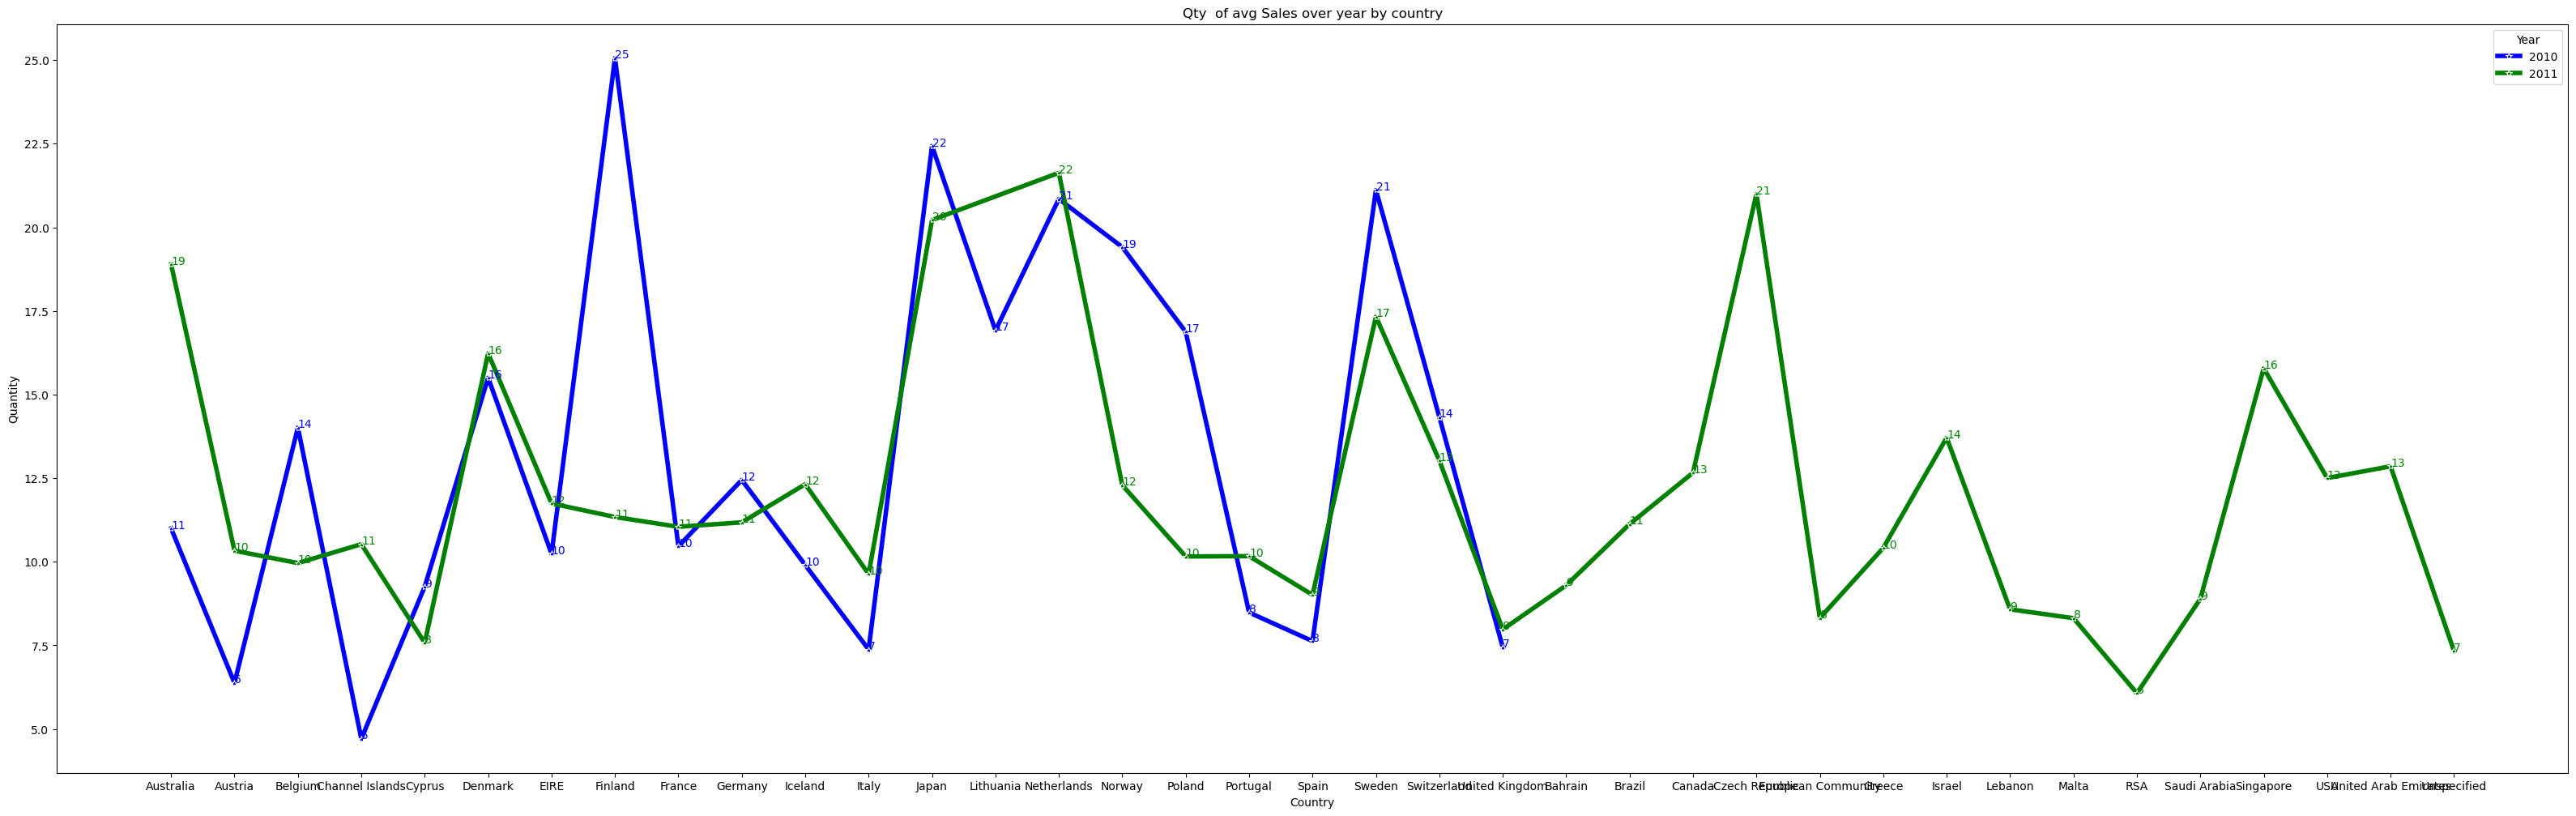

In [43]:
plt.figure(figsize=(40,12))
ax=sns.lineplot(data=d3,x='Country',y='Quantity',hue='Year',marker="*",palette=['Blue','Green'],linewidth=4)
for i in ax.lines:
    for x, y in zip(i.get_xdata(), i.get_ydata()):
        ax.text(x, y, f"{y:.0f}", fontsize=10, color=i.get_color())
plt.title("Qty  of avg Sales over year by country")
plt.savefig("Qty  of avg Sales over year by country.png")
plt.show()

# Top 10 Products

In [45]:
d4=d2.groupby(by=['Description']).agg(total_qty=('Quantity',np.sum))

In [46]:
d5=d4.sort_values(by=['total_qty'],ascending=False).head(10)
d5

,total_qty
Description,
ASSORTED COLOUR BIRD ORNAMENT,20297
WHITE HANGING HEART T-LIGHT HOLDER,20180
JUMBO BAG RED RETROSPOT,19943
PACK OF 72 RETROSPOT CAKE CASES,17821
LUNCH BAG RED RETROSPOT,12692
WORLD WAR 2 GLIDERS ASSTD DESIGNS,12447
VICTORIAN GLASS HANGING T-LIGHT,11867
PACK OF 60 PINK PAISLEY CAKE CASES,10523
RABBIT NIGHT LIGHT,10367


<Figure size 1500x1000 with 0 Axes>

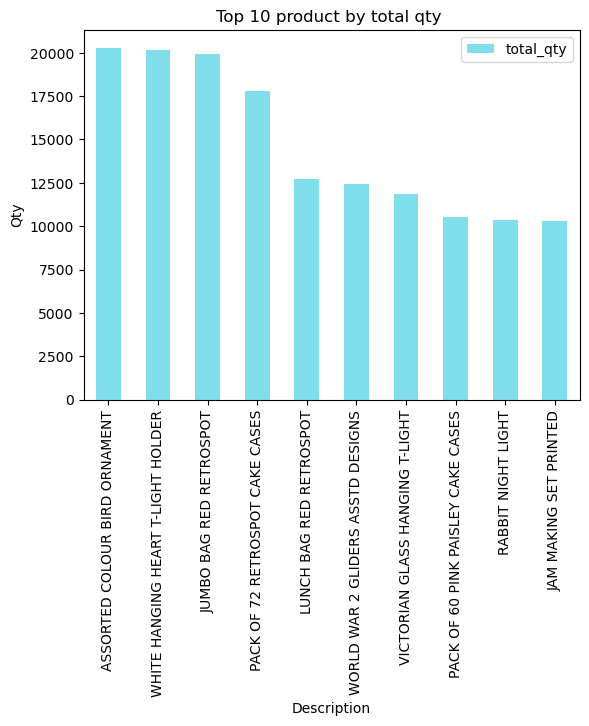

In [47]:
plt.figure(figsize=(15,10))
d5.plot(kind='bar',color=['#80DEEA'])
plt.title("Top 10 product by total qty ")
plt.ylabel("Qty")
plt.savefig("Top 10 products by qty.png")
plt.show()

# Total Qty Sales by Month wise

In [49]:
d6=d2.groupby(by='Months')[['Quantity']].sum()
d7=d6.sort_values(by=['Quantity'],ascending=False).reset_index()
d7

,Months,Quantity
0,November,476105
1,October,389527
2,September,364743
3,December,340634
4,August,249437
5,May,244852
6,July,240378
7,June,230541
8,March,223877
9,April,189038


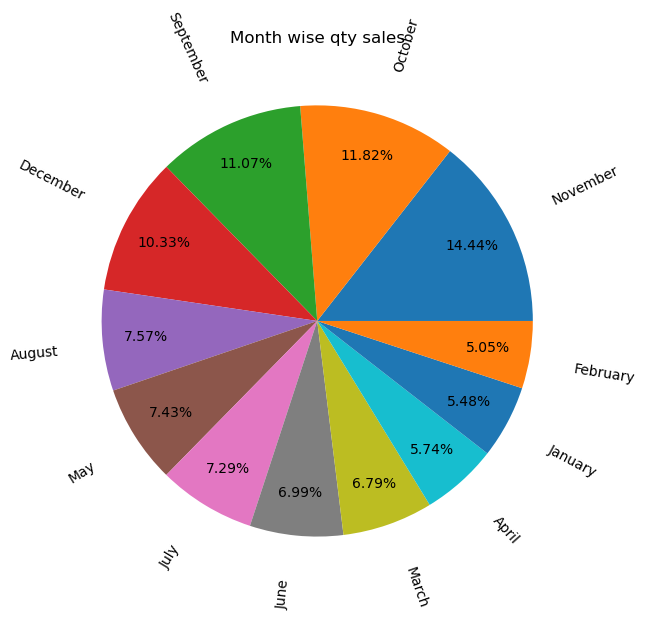

In [50]:
plt.figure(figsize=(7,7))
plt.pie(data=d7,x='Quantity',labels=d7['Months'],autopct="%1.2f%%",labeldistance=1.2,pctdistance=0.8,rotatelabels=True)
plt.title("Month wise qty sales")
plt.savefig("month wise qty sales.png")
plt.show()

In [51]:
d2.to_csv("Sales_project.csv",index=False)

# Business insights

#  1.Weekly Sales Trend (Weeks 48–52)

Observation:
Sales peak during October and November (Weeks 48–49) because of:
Christmas
Good Friday–related purchases
Year-end bonuses
Holiday shopping season

Recommendation:
To maintain momentum during non-festive months:
Introduce quarterly “Big Billion” sales
Clear old/unsold inventory with targeted discounts
Create monthly flash sale events
Run loyalty/reward programs to increase repeat purchases
This strategy will help stabilize sales and reduce dependency on festive months.

# 2.Sales significantly drop during January, February, and April.

Possible Reason:
These months are typically outside festive seasons, so customer spending is lower.

# Introduce seasonal discounts

Offer gift cards and limited-time vouchers,
Run email/SMS remarketing campaigns targeting inactive customers,
This will help smooth the sales curve and reach monthly targets.

# 3. Year-on-Year Country Performance
Sales expanded to more countries in 2011 compared to 2010, showing market growth.
However, several countries show a decline in sales in 2011 vs 2010.

Possible Reason:
This may be due to reduced marketing engagement or increased competition.

# Strengthen marketing efforts in declining regions

Provide performance-based incentives for the marketing/sales team
Run localized promotions in underperforming countries
Analyze customer segments to focus on high-value regions
This will help recover market share and sustain growth.